In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
data= pd.read_csv('Train.csv')
df= pd.DataFrame(data)
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The percentage of Y class : 0.69
The percentage of N class : 0.31


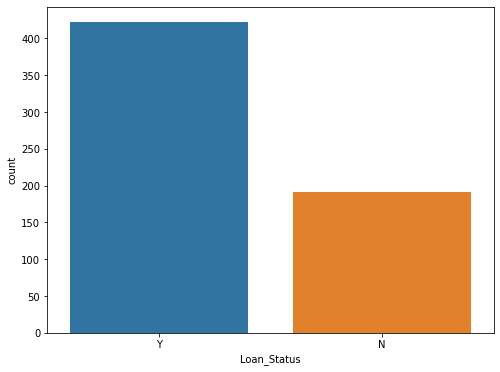

In [5]:
#Plot bar graph to check the proportion of loans approved and not approved
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

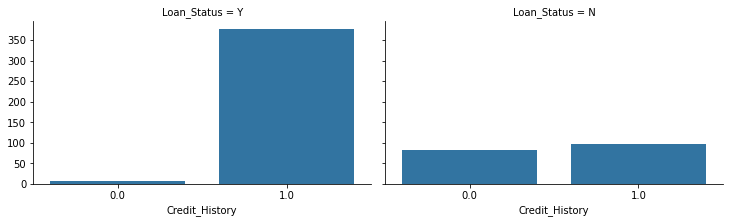

In [6]:
#Credit history seems to have a strong correlation with approval of loan
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

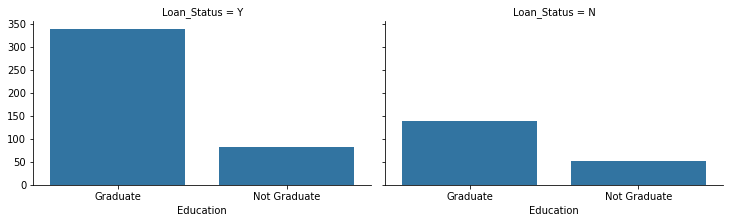

In [7]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');
#Education also seems to have some correlation with loan approval

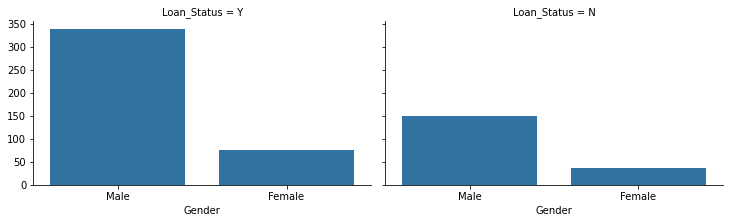

In [8]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');
#This might suggest that the number of males who applied and got a loan is more than the number of females who applied for a loan

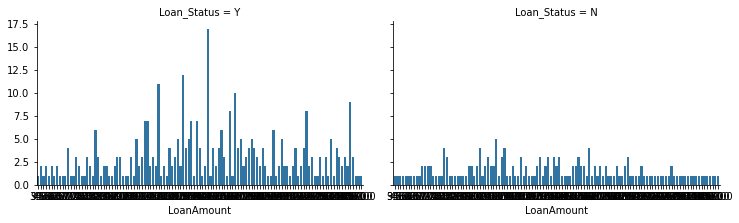

In [9]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'LoanAmount');


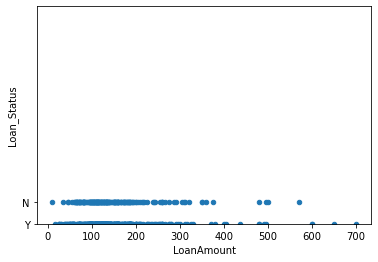

In [10]:
var = 'LoanAmount'
data = pd.concat([df['Loan_Status'], df[var]], axis=1)
data.plot.scatter(x=var, y='Loan_Status', ylim=(0,10));
#There seem to be some outliers 

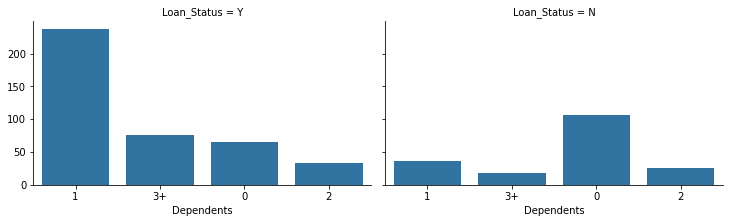

In [11]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Dependents');

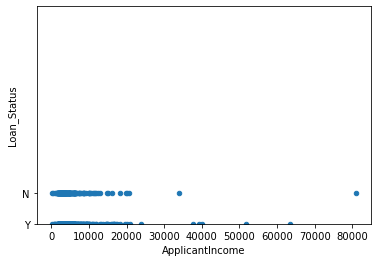

In [12]:
#scatter plot Education/saleprice
var = 'ApplicantIncome'
data = pd.concat([df['Loan_Status'], df[var]], axis=1)
data.plot.scatter(x=var, y='Loan_Status', ylim=(0,7));
#There definitely are outliers

In [13]:
df.shape

(614, 13)

In [14]:
df.drop(['Loan_ID'], axis=1, inplace=True)
#loan Id is not necessary 

In [15]:
#imputing missing values with the most  frequesnt values
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.isnull().sum().any()

False

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [17]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()    
df['Education']= label_encoder.fit_transform(df['Education'])   
df['Gender']= label_encoder.fit_transform(df['Gender'])   
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])   
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])  
df['Married']= label_encoder.fit_transform(df['Married']) 

In [18]:
df.Property_Area.replace({'Urban':1,'Semiurban':2,'Rural':0},inplace=True)



In [19]:
df.Dependents.replace({'3+':3},inplace=True)
df.Dependents = df.Dependents.astype(int)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


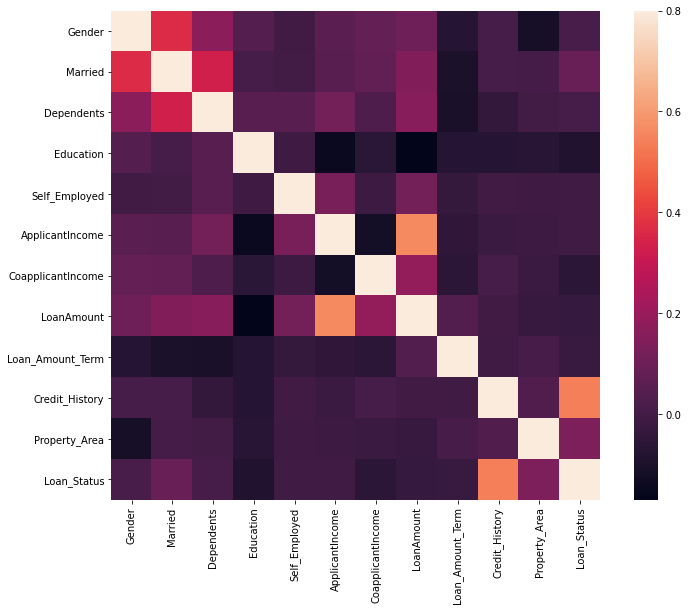

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

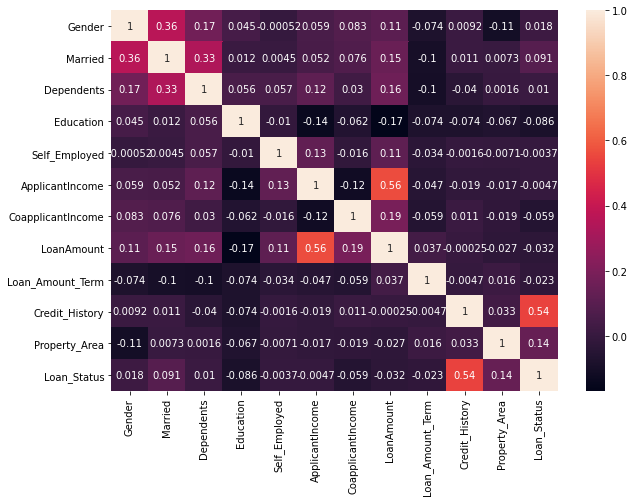

In [22]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [23]:
df.drop(['CoapplicantIncome','ApplicantIncome'], axis=1, inplace=True)
#drop the above columns since they show strong multicollinearity

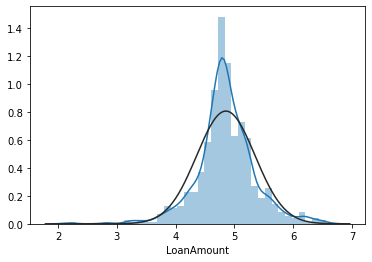

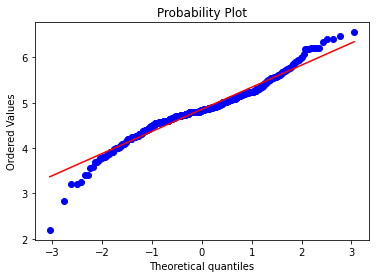

In [24]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['LoanAmount'], plot=plt)
#loan amount is not normally distributed, so correct it using log transformation

In [25]:
#calculate Z score to find outliers
z = np.abs(stats.zscore(df))
print(z)

[[0.47234264 1.37208932 0.73780632 ... 0.41173269 0.10798877 0.67451931]
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.33586108 1.48253724]
 [0.47234264 0.72881553 0.73780632 ... 0.41173269 0.10798877 0.67451931]
 ...
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 0.10798877 0.67451931]
 [0.47234264 0.72881553 1.24474546 ... 0.41173269 0.10798877 0.67451931]
 [2.11710719 1.37208932 0.73780632 ... 2.42876026 1.11988354 1.48253724]]


In [26]:
threshold = 3
print(np.where(z > 3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 171, 242, 262, 313,
       369, 495, 497, 546, 555, 561, 568, 575, 585], dtype=int64), array([5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6],
      dtype=int64))


In [27]:
#removing all outliers using the threshold frequency
df= df[(z < 3).all(axis=1)]

In [28]:
df.shape

(595, 10)

In [29]:
X=df.iloc[:, :-1].values
y=df.iloc[:,-1].values


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [34]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 21  18]
 [  4 106]]


0.8523489932885906

In [35]:
#Random forest classification
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42,max_depth =4,min_samples_leaf=4)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       n_estimators=20, random_state=42)

In [36]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 21  18]
 [  1 109]]


0.87248322147651

In [38]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 21  18]
 [  1 109]]


0.87248322147651

In [41]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [42]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 21  18]
 [  1 109]]


0.87248322147651

In [44]:
#Kernel SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [45]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 21  18]
 [  3 107]]


0.8590604026845637